In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('Downloads/petr4_treinamento.csv')
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [3]:
df_train = df_train.drop('Date', axis = 1)
df_train

,Open,High,Low,Close,Adj Close,Volume
0,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...
1240,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [4]:
for coluna in df_train.columns:
    if df_train[coluna].dtype == 'float64':
        if df_train[coluna].isna().any():
            media = df_train[coluna].mean()
            df_train[coluna].fillna(media, inplace=True)

In [5]:
previsores = df_train.iloc[:,:].values
previsores.shape[1]

6

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

previsores = scaler.fit_transform(previsores)

In [7]:
x_train = []  
y_train = []  
timestamp = 90

In [8]:
len(previsores)

1245

In [9]:
for i in range(timestamp, len(previsores)):
    x_train.append(previsores[i - timestamp:i, 0:6])
    y_train.append(previsores[i, 0])

In [10]:
import numpy as np

x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

model = Sequential()

model.add(LSTM(120, return_sequences=True, input_shape=(x_train.shape[1], 6)))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss ='mean_squared_error', metrics = ['mean_squared_error'])

In [12]:
es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10,
                   verbose = 1)

In [13]:
rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 5,
                        verbose = 1)

In [14]:
mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss',
                      sabe_best_only = True)

In [72]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32,
         callbacks = [es, rlr, mcp])

Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 0.0018 - mean_squared_error: 0.0018

C:\Users\Ambrósio\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 66s 2s/step - loss: 0.0018 - mean_squared_error: 0.0018 - lr: 3.2000e-07
Epoch 2/100
37/37 [==============================] - 78s 2s/step - loss: 0.0017 - mean_squared_error: 0.0017 - lr: 3.2000e-07
Epoch 3/100
37/37 [==============================] - 65s 2s/step - loss: 0.0016 - mean_squared_error: 0.0016 - lr: 3.2000e-07
Epoch 4/100
37/37 [==============================] - 71s 2s/step - loss: 0.0016 - mean_squared_error: 0.0016 - lr: 3.2000e-07
Epoch 5/100
37/37 [==============================] - 75s 2s/step - loss: 0.0015 - mean_squared_error: 0.0015 - lr: 3.2000e-07
Epoch 6/100
37/37 [==============================] - 63s 2s/step - loss: 0.0018 - mean_squared_error: 0.0018 - lr: 3.2000e-07
Epoch 7/100
37/37 [==============================] - 78s 2s/step - loss: 0.0018 - mean_squared_error: 0.0018 - lr: 3.2000e-07
Epoch 8/100
37/37 [==============================] - 65s 2s/step - loss: 0.0018 - mean_squared_error: 0.0018 - lr: 3.2000e-07
Epoc

In [18]:
df_test = pd.read_csv('Downloads/petr4_teste.csv')
df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000


In [20]:
y_test = df_test.iloc[:, 1:2].values

In [21]:
frames = [df_train, df_test]

In [42]:
base_completa = pd.concat(frames)
base_completa.shape

(1267, 7)

In [23]:
base_completa = base_completa.drop('Date', axis = 1)
base_completa

,Open,High,Low,Close,Adj Close,Volume
0,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...
17,19.340000,19.340000,19.340000,19.340000,19.301397,0.0
18,19.620001,19.980000,19.100000,19.930000,19.890221,81989500.0
19,19.670000,20.049999,19.570000,19.850000,19.810381,55726200.0
20,19.770000,19.770000,19.360001,19.490000,19.451097,46203000.0


In [26]:
entradas = base_completa[len(base_completa) - len(df_test) - timestamp:].values

In [73]:
normalizador = MinMaxScaler()
entradas = normalizador.fit_transform(entradas)
entradas

array([[6.41025641e-02, 4.14012805e-02, 5.12820513e-02, 6.48148148e-02,
        6.48148535e-02, 1.14001944e-28],
       [3.68589744e-02, 1.27388555e-02, 3.84615385e-02, 6.17283951e-02,
        6.17284466e-02, 1.14413821e-28],
       [4.16666667e-02, 2.07006402e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.46672434e-28],
       [0.00000000e+00, 0.00000000e+00, 4.80769231e-03, 3.08641975e-02,
        3.08640687e-02, 3.47390401e-28],
       [5.12820513e-02, 6.68789915e-02, 6.08974359e-02, 8.79629630e-02,
        8.79630596e-02, 2.52490668e-28],
       [6.89102564e-02, 6.52866346e-02, 8.01282051e-02, 1.11111111e-01,
        1.11111111e-01, 7.60036703e-29],
       [1.66666667e-01, 1.40127411e-01, 1.26602564e-01, 1.48148148e-01,
        1.48148148e-01, 2.36637802e-28],
       [1.79487179e-01, 1.99044618e-01, 1.71474359e-01, 2.42283951e-01,
        2.42284021e-01, 2.86672271e-28],
       [2.38782051e-01, 1.99044618e-01, 2.53205128e-01, 2.42283951e-01,
        2.42284021e-01, 

In [71]:
x_test = []

length = len(entradas)

for i in range(timestamp, length):
    
    x_test.append(entradas[i - timestamp:i, 0:6])

x_test = np.array(x_test)
x_test

array([[[6.41025641e-02, 4.14012805e-02, 5.12820513e-02, 6.48148148e-02,
         6.48148535e-02, 1.14001944e-28],
        [3.68589744e-02, 1.27388555e-02, 3.84615385e-02, 6.17283951e-02,
         6.17284466e-02, 1.14413821e-28],
        [4.16666667e-02, 2.07006402e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 2.46672434e-28],
        ...,
        [3.94230769e-01, 3.77388436e-01, 4.07051282e-01, 4.01234414e-01,
         4.01234284e-01, 9.86837223e-29],
        [4.11858974e-01, 3.75796079e-01, 4.10256410e-01, 4.08950617e-01,
         4.08950611e-01, 7.96581885e-29],
        [4.11858974e-01, 3.71019167e-01, 4.26282051e-01, 4.08950617e-01,
         4.08950611e-01, 0.00000000e+00]],

       [[3.68589744e-02, 1.27388555e-02, 3.84615385e-02, 6.17283951e-02,
         6.17284466e-02, 1.14413821e-28],
        [4.16666667e-02, 2.07006402e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 2.46672434e-28],
        [0.00000000e+00, 0.00000000e+00, 4.80769231e-03, 3.086419

In [62]:
previsor2 = df_train.iloc[: , 0:1].values
previsor2

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [63]:
scaler2 = MinMaxScaler()
scaler2.fit_transform(previsor2)

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [74]:
pred = model.predict(x_test)
pred = scaler2.inverse_transform(pred)
pred

1/1 [==============================] - 1s 1s/step


array([[12.548666],
       [12.869858],
       [13.266326],
       [13.757371],
       [14.25044 ],
       [14.709156],
       [15.116881],
       [15.338002],
       [15.4876  ],
       [15.674135],
       [15.933273],
       [16.337498],
       [17.143343],
       [18.158243],
       [18.988668],
       [19.493696],
       [19.597261],
       [20.00803 ],
       [20.89354 ],
       [22.127346],
       [23.18514 ],
       [23.452314]], dtype=float32)

In [75]:
(pred - y_test).mean()

-0.6774188576743387

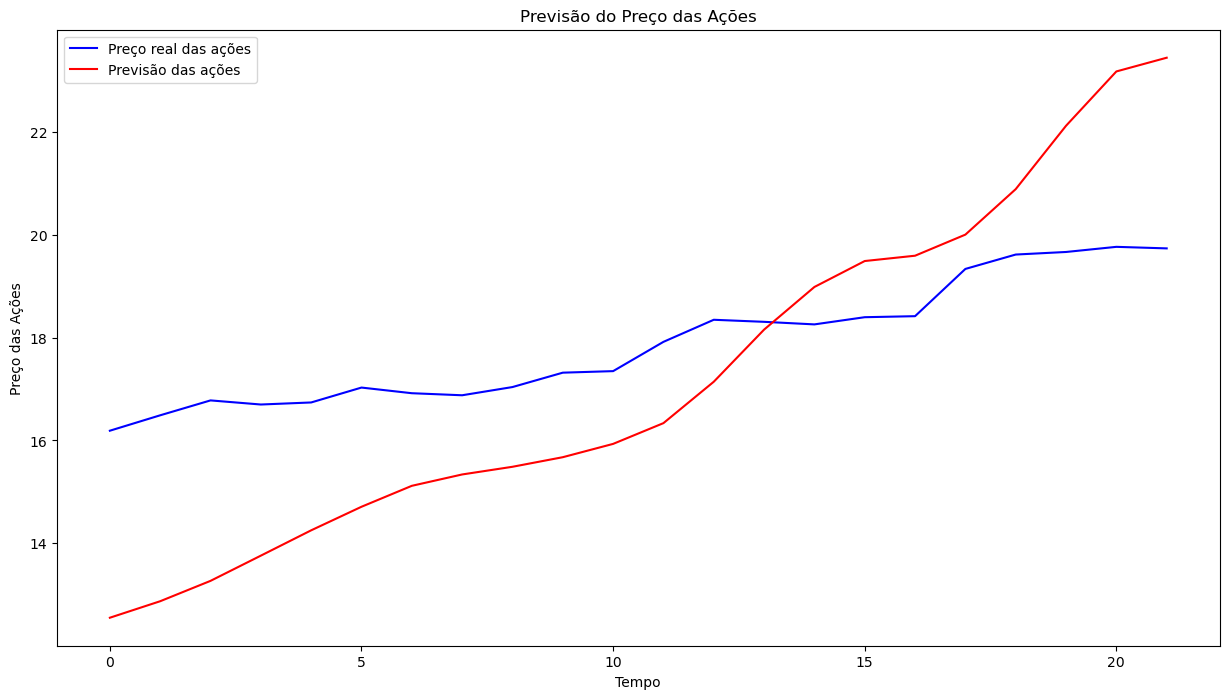

In [76]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 8

plt.plot(y_test, color='b', label='Preço real das ações')
plt.plot(pred, color='r', label='Previsão das ações')

plt.title('Previsão do Preço das Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')

plt.legend()


plt.show()